<a href="https://colab.research.google.com/github/zakrocki-gabriella/ANLY590/blob/master/Homework3_ANLY590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLY590 - Homework 3


##**I. Autoencoder**








A convolutional autoencoder is a particular flavor of autoencoder where we
use convolutional layers instead of Dense layers. We have previously applied
autoencoders to images using only Dense layers and the result worked fairly
well. However, the local spatial correlations of images imply that we should
Be able to do better using convolutional layers instead of Dense layers.

 > ### 1. Convolutional Autoencoder

*   Build and fit a convolutional autoencoder for the CIFAR10 dataset
*  The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.


*  After training your network, visualize some examples of input images and their decoded reconstruction.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from keras.layers import Input, Dense, Activation, Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D, Flatten, BatchNormalization, Reshape
from tensorflow.keras.models import Model, Sequential
from keras.datasets import cifar10
import tensorflow_datasets as tfds

In [5]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

170500096/170498071 [==============================] - 6s 0us/step


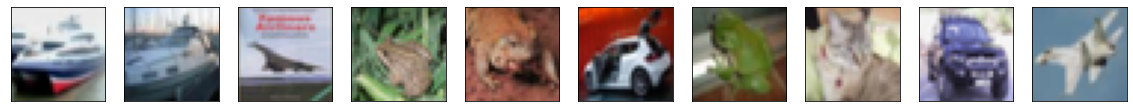

In [6]:
# looking at some of the original images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
input_img = tfk.Input(shape=(32, 32, 3))

x = tfkl.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tfkl.MaxPooling2D((2, 2), padding='same')(x)
x = tfkl.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = tfkl.MaxPooling2D((2, 2), padding='same')(x)


x = tfkl.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = tfkl.UpSampling2D((2, 2))(x)
x = tfkl.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tfkl.UpSampling2D((2, 2))(x)
decoded = tfkl.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tfk.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 128)      

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=150,
                shuffle=True,
                steps_per_epoch = 200,
                validation_data=(x_test, x_test))


Epoch 1/10
200/200 [==============================] - 231s 1s/step - loss: 0.5823 - accuracy: 0.6871 - val_loss: 0.5646 - val_accuracy: 0.7776
Epoch 2/10
200/200 [==============================] - 236s 1s/step - loss: 0.5616 - accuracy: 0.7840 - val_loss: 0.5616 - val_accuracy: 0.7953
Epoch 3/10
200/200 [==============================] - 232s 1s/step - loss: 0.5593 - accuracy: 0.7998 - val_loss: 0.5589 - val_accuracy: 0.8039
Epoch 4/10
200/200 [==============================] - 233s 1s/step - loss: 0.5580 - accuracy: 0.8066 - val_loss: 0.5585 - val_accuracy: 0.8092
Epoch 5/10
200/200 [==============================] - 234s 1s/step - loss: 0.5572 - accuracy: 0.8110 - val_loss: 0.5584 - val_accuracy: 0.7879
Epoch 6/10
200/200 [==============================] - 233s 1s/step - loss: 0.5570 - accuracy: 0.8109 - val_loss: 0.5589 - val_accuracy: 0.8148
Epoch 7/10
200/200 [==============================] - 234s 1s/step - loss: 0.5559 - accuracy: 0.8142 - val_loss: 0.5579 - val_accuracy: 0.8248

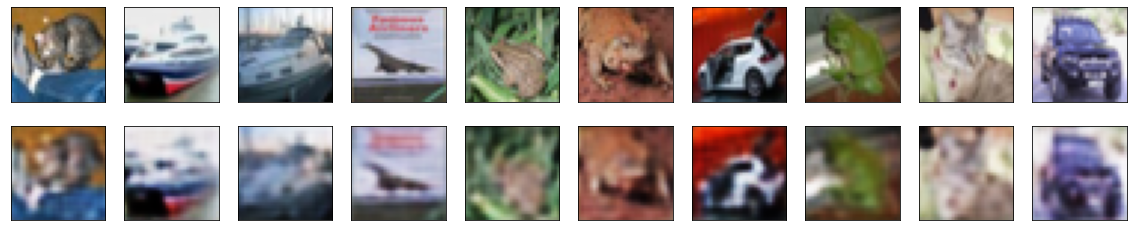

In [10]:
pred_img = autoencoder.predict(x_test)
# the top row is the original set of images, the bottom row is the reconstructed images from the autoencoder
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_img[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##**II. Image Classification**



> ### 2.1  Deep CNN


> Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network
depth.Train your network end-to-end. Report on your model’s performance on the training set and test set.



In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [21]:
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))


In [22]:
from tensorflow.keras.utils import to_categorical
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

In [23]:
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32,32,3))

x_test = x_test.astype('float32') / 255. 
x_test = np.reshape(x_test, (len(x_test), 32,32,3))

In [24]:
data, info = tfds.load('cifar10', with_info=True)
img_shape = info.features['image'].shape
img_shape

input_img = Input(shape=(32, 32, 3))

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(encoded)
x = Dense(100, activation='relu')(x)
decoded = Dense(10, activation='softmax')(x)

deep_cnn = tfk.Model(input_img, decoded)
deep_cnn.summary()


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteU6B2WP/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteU6B2WP/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          9232    

In [85]:
deep_cnn.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
deep_cnn.fit(x_train, y_train,
                epochs=10,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, y_test))

Epoch 1/10
100/100 [==============================] - 225s 2s/step - loss: 1.8436 - accuracy: 0.3299 - val_loss: 1.5576 - val_accuracy: 0.4350
Epoch 2/10
100/100 [==============================] - 228s 2s/step - loss: 1.4813 - accuracy: 0.4629 - val_loss: 1.3918 - val_accuracy: 0.4975
Epoch 3/10
100/100 [==============================] - 225s 2s/step - loss: 1.3729 - accuracy: 0.5065 - val_loss: 1.3093 - val_accuracy: 0.5323
Epoch 4/10
100/100 [==============================] - 225s 2s/step - loss: 1.2651 - accuracy: 0.5479 - val_loss: 1.2275 - val_accuracy: 0.5638
Epoch 5/10
100/100 [==============================] - 227s 2s/step - loss: 1.1996 - accuracy: 0.5770 - val_loss: 1.1746 - val_accuracy: 0.5849
Epoch 6/10
100/100 [==============================] - 225s 2s/step - loss: 1.1464 - accuracy: 0.5977 - val_loss: 1.1431 - val_accuracy: 0.5957
Epoch 7/10
100/100 [==============================] - 228s 2s/step - loss: 1.1022 - accuracy: 0.6129 - val_loss: 1.0848 - val_accuracy: 0.6191

In [83]:
_, acc = deep_cnn.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 64.900


In [96]:
print("The model's accuracy score on training set:\n")
score_train = deep_cnn.evaluate(x_train, y_train, verbose=0)
print(score_train[1])
print("The model's accuracy score on test set:\n")
test_images = np.array(list(map(lambda x: np.resize(x, (48,48,3)), x_test)))
score_test = deep_cnn.evaluate(x_test, y_test, verbose=0)
print(score_test[1])

The model's accuracy score on training set:

0.6586599946022034
The model's accuracy score on test set:

0.640500009059906


## 2.2 Transfer Learning


> Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and test set.



In [11]:
from keras.applications import VGG16


In [12]:

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [14]:
model = tfk.models.Sequential()
model.add(conv_base)
model.add(tfkl.Flatten())
model.add(tfkl.Dense(64, activation='relu'))
model.add(tfkl.Dropout(0.5))
model.add(tfkl.Dense(10, activation='softmax'))

# Freeze the convolutional base
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [25]:
model.summary()

train_images = np.array(list(map(lambda x: np.resize(x, (32,32,3)), x_train)))
train_images.shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


(50000, 32, 32, 3)

In [27]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 489s 625ms/step - loss: 1.3299 - accuracy: 0.5463
Epoch 2/5
782/782 [==============================] - 493s 630ms/step - loss: 1.3136 - accuracy: 0.5498
Epoch 3/5
782/782 [==============================] - 484s 620ms/step - loss: 1.3095 - accuracy: 0.5516
Epoch 4/5
782/782 [==============================] - 482s 616ms/step - loss: 1.2969 - accuracy: 0.5584
Epoch 5/5
782/782 [==============================] - 488s 624ms/step - loss: 1.3007 - accuracy: 0.5579


In [28]:
print("The model's accuracy score on training set:\n")
score_train = model.evaluate(train_images, y_train, verbose=0)
print(score_train[1])
print("The model's accuracy score on test set:\n")
test_images = np.array(list(map(lambda x: np.resize(x, (32,32,3)), x_test)))
score_test = model.evaluate(x_test, y_test, verbose=0)
print(score_test[1])

The model's accuracy score on training set:

0.6167200207710266
The model's accuracy score on test set:

0.5853000283241272


## **III. Text Classification**



> While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language background. 

> In this problem, we will build models that read text segments
(messages) and identify whether they are SPAM or HAM.
Wikipedia describes SPAM as “the use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.” The term ‘HAM’ was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desired and isn’t considered SPAM.”

> Dataset. The dataset consists of ∼ 5500 messages along with binary labels(SPAM or HAM) and is already preprocessed. So basically each sample is
like [MESSAGE, LABEL]







> ## 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification
task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).



In [35]:
import os
from keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, SimpleRNN, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
os.getcwd()

'/content'

In [8]:
spam = pd.read_csv('SPAM_detection.csv') 
spam.head()
# 1 is SPAM 0 is HAM

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [10]:
spam_data = spam['Message']
cat_data = spam['category_val']

In [18]:
max_features = 10000
maxlen = 500
# cut off the words after seeing 500 words in each document(email)
tokenizer = Tokenizer()

tokenizer.fit_on_texts(spam_data)
sequences = tokenizer.texts_to_sequences(spam_data)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = cat_data[indices]

Found 9004 unique words: 
data shape:  (5572, 500)


In [19]:
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 14s 231ms/step - loss: 0.3083 - acc: 0.8760 - val_loss: 0.1506 - val_acc: 0.9507
Epoch 2/10
60/60 [==============================] - 14s 236ms/step - loss: 0.0996 - acc: 0.9781 - val_loss: 0.0840 - val_acc: 0.9832
Epoch 3/10
60/60 [==============================] - 14s 238ms/step - loss: 0.0484 - acc: 0.9910 - val_loss: 0.0508 - val_acc: 0.9865
Epoch 4/10
60/60 [==============================] - 14s 237ms/step - loss: 0.0419 - acc: 0.9905 - val_loss: 0.0570 - val_acc: 0.9821
Epoch 5/10
60/60 [==============================] - 14s 237ms/step - loss: 0.0214 - acc: 0.9952 - val_loss: 0.0594 - val_acc: 0.9809
Epoch 6/10
60/60 [==============================] - 14s 237ms/step - loss: 0.0142 - acc: 0.9966 - val_loss: 0.0491 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 14s 237ms/step - loss: 0.0113 - acc: 0.9966 - val_loss: 0.0537 - val_acc: 0.9854
Epoch 8/10
60/60 [==============================] - 14s 236ms/step - 

In [24]:

acc = model.evaluate(texts_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

35/35 [==============================] - 1s 33ms/step - loss: 0.0745 - acc: 0.9812
Test loss is 0.07 accuracy is 0.98  


In [25]:
y_pred1 = model.predict(texts_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred1)

## 3.2 CNN


> Build and train a 1D CNN for this text classification task. We recommend
you do a character-level convolution (with character embeddings). You might gain some insight and inspiration from these text classification approaches.

> Tips: after splitting every character in each training sample, the maximum length of training samples can be really big. If you choose to only do the padding trick to all the samples, it might raise OOM issues. So instead of padding only, you can also cut each sample at a certain point, which can make
training more efficient and feasible while using CNN.



In [27]:
spamd = pd.read_csv('SPAM_detection.csv')

In [28]:
import re
# lowercase and remove punct
spamd.Message = spamd.Message.apply(lambda x: x.lower())
spamd.Message = spamd.Message.apply(lambda x: re.sub(r'[^\w\s]','',x) )

In [29]:
# split each message by character ahead of tokenizing

def concat_list(l):
  concat = ''
  for word in l:
      concat += word + ' '
  return concat

spamd.Message = [concat_list(data) for data in spamd.Message]

In [30]:

# set up the character level tokenizer to preprocess the data

from keras.preprocessing import text as keras_text, sequence as keras_seq

tokenizer2 = Tokenizer(filters ='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,char_level = True, oov_token =True)
tokenizer2.fit_on_texts(spamd.Message.values)

In [31]:

# tokenize the text and turn the labels into a usable array

X = tokenizer2.texts_to_sequences(spamd.Message.values)
X = pad_sequences(X, maxlen = 50)

print('Shape of data tensor:', X.shape)

Y = np.array(spamd.category_val)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (5572, 50)
Shape of label tensor: (5572,)


In [32]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size = 0.2)

In [36]:
model2 = Sequential()

model2.add(Embedding(10000,250,input_length=X_train2.shape[1]))
model2.add(tfkl.Conv1D(32,5, activation='tanh'))
model2.add(GlobalMaxPooling1D())
model2.add(tfkl.Dense(1,activation="sigmoid"))

In [37]:
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

cnn_history = model2.fit(X_train2,Y_train2,epochs = 5,validation_data = (X_test2, Y_test2), batch_size = 64,verbose=1)

Epoch 1/5
70/70 [==============================] - 4s 62ms/step - loss: 0.3028 - acc: 0.8943 - val_loss: 0.1915 - val_acc: 0.9471
Epoch 2/5
70/70 [==============================] - 4s 59ms/step - loss: 0.1616 - acc: 0.9578 - val_loss: 0.1821 - val_acc: 0.9462
Epoch 3/5
70/70 [==============================] - 4s 60ms/step - loss: 0.1488 - acc: 0.9574 - val_loss: 0.1703 - val_acc: 0.9480
Epoch 4/5
70/70 [==============================] - 4s 59ms/step - loss: 0.1376 - acc: 0.9583 - val_loss: 0.1642 - val_acc: 0.9498
Epoch 5/5
70/70 [==============================] - 4s 60ms/step - loss: 0.1287 - acc: 0.9628 - val_loss: 0.1549 - val_acc: 0.9534


In [38]:
acc2 = model2.evaluate(X_test2,Y_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc2[0],acc2[1]))

35/35 [==============================] - 0s 4ms/step - loss: 0.1549 - acc: 0.9534
Test loss is 0.15 accuracy is 0.95  


In [39]:
y_pred2 = model2.predict(X_test2)
fpr2, tpr2, thresholds2 = roc_curve(Y_test2,y_pred2)

## 3.3 
> Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

In [40]:
from sklearn.metrics import auc
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2,tpr2)

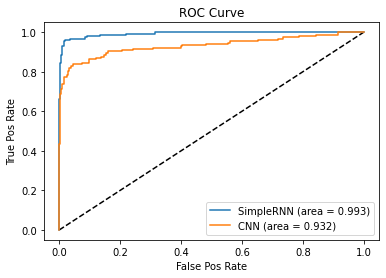

In [41]:
# Both methods seem to give us similar results.
# plotting the ROC curve for both models

plt.figure(1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1,tpr1, label = 'SimpleRNN (area = {:.3f})'.format(auc1))
plt.plot(fpr2,tpr2, label = 'CNN (area = {:.3f})'.format(auc2))

plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
